In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


In [2]:
data = pd.read_csv('taxa-de-suicidio-1980-01-15-2022-01-15.csv.csv', sep=';')

In [10]:
#Criação de parâmetros
norte = ["AC", "AP", "AM", "PA", "RO", "RM", "To"]
nordeste = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
centro_oeste = ["GO", "MT", "MS", "DF"]
sudeste = ["ES", "MG", "RJ", "SP"]
sul = ["PR", "RS", "SC"]

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     1161 non-null   object 
 1   periodo  1161 non-null   int64  
 2   valor    1161 non-null   float64
 3   regiao   1075 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 36.4+ KB


In [11]:
null_val = data.loc[data['valor'] == 0.00]
null_year = null_val['periodo'].tolist()

for i in null_year:
    data = data.drop(data[data['periodo'] == i].index)



In [6]:
print(data.head())

  nome  periodo  valor
0   DF     1980   1.18
1   GO     1980   3.21
2   MT     1980   0.52
3   MS     1980   5.69
4   RS     1980   8.25


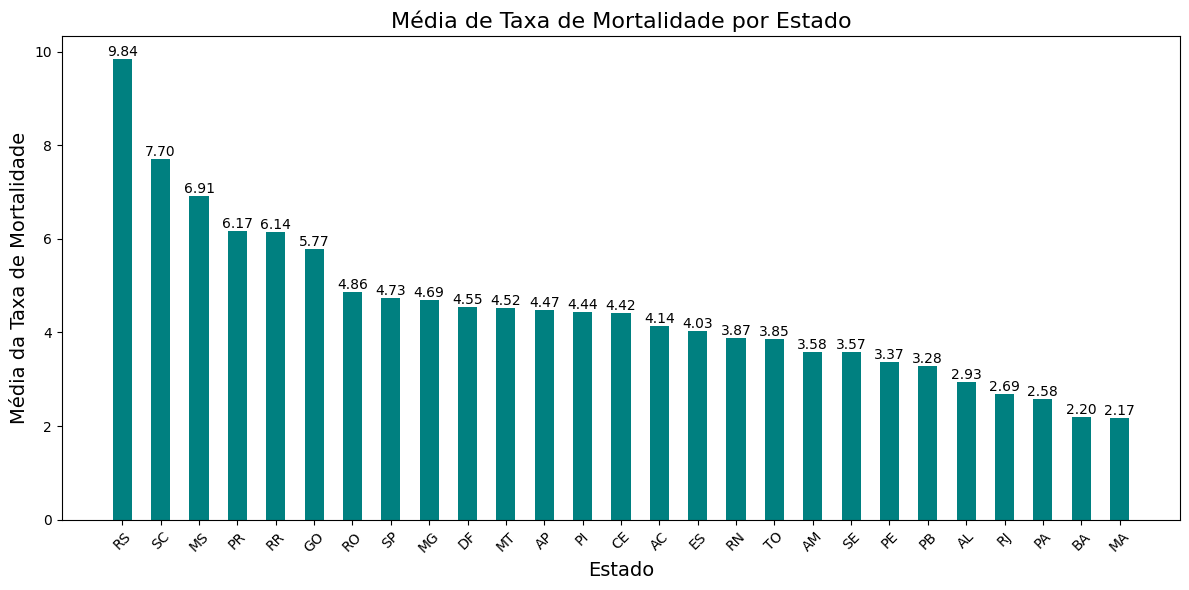

In [ ]:
# Calcula a taxa para cada estado
media_taxa = data.groupby('nome')['valor'].mean().reset_index()

# Ordena da maior taxa para a menor
media_taxa = media_taxa.sort_values(by='valor', ascending=False)

# Gera os gráficos
plt.figure(figsize=(12, 6))
bars = plt.bar(media_taxa['nome'], media_taxa['valor'], color='teal', width=0.5)

# Serve para adicionar os valores que ficam acimas das barras
for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')  

# Adiciona os títulos e os rótulos
plt.title('Média de Taxa de Mortalidade por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média da Taxa de Mortalidade', fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


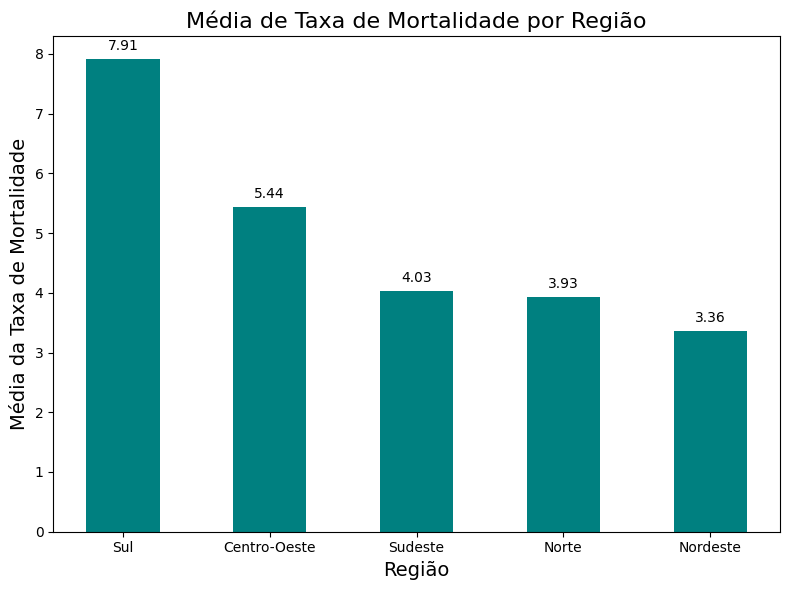

In [8]:
# Função para mapear estado para sua região
def get_regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro-Oeste'
    elif estado in sudeste:
        return 'Sudeste'
    elif estado in sul:
        return 'Sul'
    
    
data['regiao'] = data['nome'].apply(get_regiao)

media_regiao = data.groupby('regiao')['valor'].mean().reset_index()

media_regiao = media_regiao.sort_values(by='valor', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(media_regiao['regiao'], media_regiao['valor'], color='teal', width=0.5)

plt.title('Média de Taxa de Mortalidade por Região', fontsize=16)
plt.xlabel('Região', fontsize=14)
plt.ylabel('Média da Taxa de Mortalidade', fontsize=14)

for i, valor in enumerate(media_regiao['valor']):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\diogo\AppData\Local\Temp\ipykernel_12756\2607821634.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Faixa Etária")
C:\Users\diogo\AppData\Local\Temp\ipykernel_12756\2607821634.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sb.barplot(data=df2, x="Ano", y="Taxa de Suicídio (por 100k hab.)", hue="Faixa Etária Mais Afetada", ci=None)


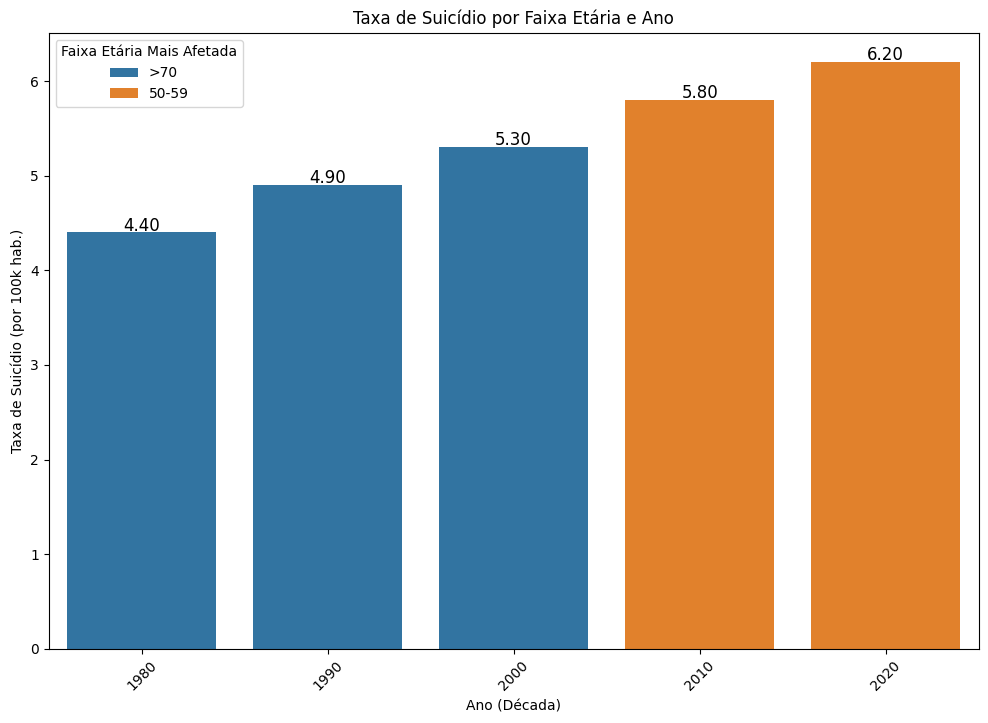

In [52]:

plt.figure(figsize=(12, 8))

plt.title("Taxa de Suicídio por Faixa Etária e Ano")
plt.xlabel("Ano (Década)")
plt.ylabel("Taxa de Suicídio (por 100k hab.)")
plt.legend(title="Faixa Etária")
plt.xticks(rotation=45)


ax = sb.barplot(data=df2, x="Ano", y="Taxa de Suicídio (por 100k hab.)", hue="Faixa Etária Mais Afetada", ci=None)
for p in ax.patches:

    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.show()

### Inferências 

Os dados coletados sobre as taxas de suicídio no Brasil entre os anos de 1980 e 2022 revelam importantes padrões geográficos e demográficos, os quais podem contribuir para uma melhor compreensão dos fatores que influenciam esse fenômeno ao longo do tempo.<br>

No âmbito estadual, o Rio Grande do Sul se destaca com a maior taxa média de suicídios, atingindo 9,84 por 100.000 habitantes. Este é seguido por Santa Catarina, com 7,70, e Mato Grosso do Sul, com 6,91. Esses números indicam que a região Sul do Brasil apresenta uma prevalência consideravelmente mais alta de suicídios, o que pode estar relacionado a fatores culturais, sociais e econômicos específicos dessas localidades.<br>

Por sua vez, a análise regional mostra que a região Sul lidera com uma taxa média de suicídios de 7,91, sendo seguida pela região Centro-Oeste (5,44) e pela região Sudeste (4,03). Esse padrão sugere uma concentração maior de suicídios no Sul e no Centro-Oeste, em comparação com outras regiões, como o Sudeste, onde as taxas são relativamente mais baixas.<br>

Ao observar as taxas de suicídio ao longo das últimas quatro décadas, é possível notar uma tendência de aumento gradual, especialmente a partir da década de 1980 até os dias atuais. Em 1980, a taxa era de 4,40, com a faixa etária mais afetada sendo a dos idosos acima dos 70 anos. Esse padrão permanece em 1990, quando a taxa aumentou para 4,90, e em 2000, com 5,30. A partir de 2010, no entanto, a faixa etária mais afetada mudou para a de 50 a 59 anos, refletindo uma alteração nas características demográficas do suicídio no país. Em 2020, a taxa atingiu 6,20, mantendo-se predominante entre as pessoas dessa faixa etária.<br>

Esses dados indicam que, ao longo do tempo, o suicídio no Brasil tem se tornado mais frequente em faixas etárias mais jovens, como os indivíduos de 50 a 59 anos, e que, apesar de um aumento geral nas taxas, o impacto entre os idosos permanece relevante. A maior incidência nas regiões Sul e Centro-Oeste, aliada ao aumento das taxas ao longo das décadas, exige uma análise cuidadosa dos fatores regionais e geracionais que podem estar influenciando esse cenário. É fundamental que políticas públicas e iniciativas de prevenção do suicídio sejam direcionadas para essas regiões e faixas etárias, com estratégias específicas para mitigar esse grave problema de saúde pública.<br>

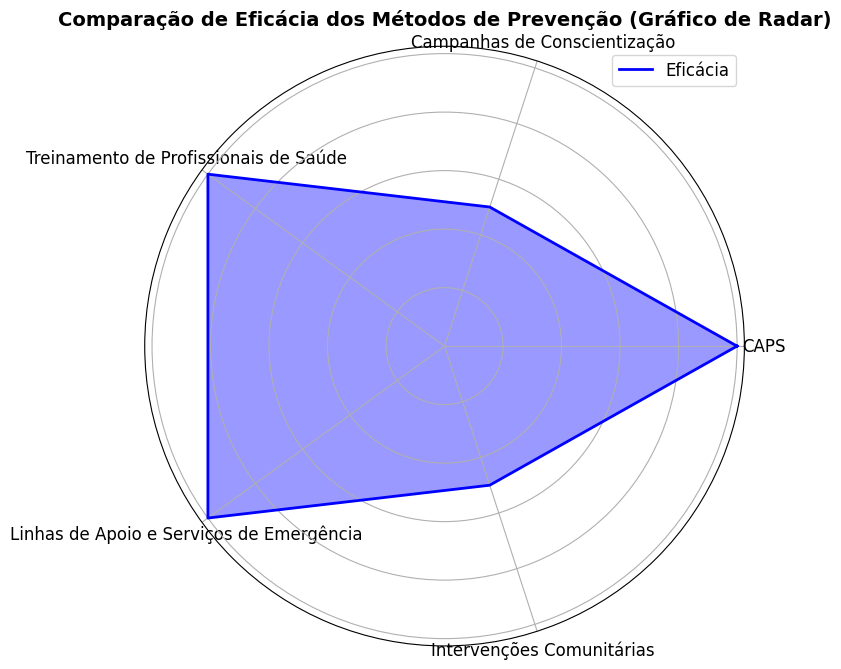

In [51]:


df3 = pd.read_csv('dados_eficacia_metodos.csv')  

eficacia_map = {'Alta': 1, 'Moderada': 0.5}
df3['Eficacia'] = df3['Eficacia'].map(eficacia_map)

metodos = df3['Metodo'].tolist()
eficacia_numerica = df3['Eficacia'].tolist()

num_metodos = len(metodos)

angles = np.linspace(0, 2 * np.pi, num_metodos, endpoint=False).tolist()

eficacia_numerica += eficacia_numerica[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), dpi=100, subplot_kw=dict(polar=True))

ax.plot(angles, eficacia_numerica, linewidth=2, linestyle='solid', label='Eficácia', color='b')

ax.fill(angles, eficacia_numerica, color='b', alpha=0.4)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(metodos, fontsize=12)


ax.set_title('Comparação de Eficácia dos Métodos de Prevenção (Gráfico de Radar)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()
